# 🛠️ Preparação dos Dados

## Extração do Arquivo

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/isenf/telecomx2/refs/heads/main/dados.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


## Remoção de Colunas Irrelevantes

In [4]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
df = df.drop(['customerID', "Total.Day"], axis = 1)

## Encoding

In [6]:
for col in df.columns:
  print(f"{col}  ->  {df[col].unique()}")

Churn  ->  ['No' 'Yes']
customer.gender  ->  ['Female' 'Male']
customer.SeniorCitizen  ->  [0 1]
customer.Partner  ->  ['Yes' 'No']
customer.Dependents  ->  ['Yes' 'No']
customer.tenure  ->  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone.PhoneService  ->  ['Yes' 'No']
phone.MultipleLines  ->  ['No' 'Yes' 'No phone service']
internet.InternetService  ->  ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity  ->  ['No' 'Yes' 'No internet service']
internet.OnlineBackup  ->  ['Yes' 'No' 'No internet service']
internet.DeviceProtection  ->  ['No' 'Yes' 'No internet service']
internet.TechSupport  ->  ['Yes' 'No' 'No internet service']
internet.StreamingTV  ->  ['Yes' 'No' 'No internet service']
internet.StreamingMovies  ->  ['No' 'Yes' 'No internet service']
account.Contract  ->  ['One year' 'Month-to-month' 'Two

In [7]:
df['customer.gender'] = df['customer.gender'].map({'Female': 0, 'Male': 1})

In [8]:
col_binarias = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService','account.PaperlessBilling']

for col in col_binarias:
  df[col] = df[col].map({'Yes': 1, 'No': 0})

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
col_categoricas = ['phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                   'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']

In [11]:
pre_processador = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), col_categoricas)],
    remainder='passthrough'
)

In [12]:
dados_transformados = pre_processador.fit_transform(df)

In [13]:
col_novas = pre_processador.get_feature_names_out()
col_novas

array(['onehot__phone.MultipleLines_No',
       'onehot__phone.MultipleLines_No phone service',
       'onehot__phone.MultipleLines_Yes',
       'onehot__internet.InternetService_DSL',
       'onehot__internet.InternetService_Fiber optic',
       'onehot__internet.InternetService_No',
       'onehot__internet.OnlineSecurity_No',
       'onehot__internet.OnlineSecurity_No internet service',
       'onehot__internet.OnlineSecurity_Yes',
       'onehot__internet.OnlineBackup_No',
       'onehot__internet.OnlineBackup_No internet service',
       'onehot__internet.OnlineBackup_Yes',
       'onehot__internet.DeviceProtection_No',
       'onehot__internet.DeviceProtection_No internet service',
       'onehot__internet.DeviceProtection_Yes',
       'onehot__internet.TechSupport_No',
       'onehot__internet.TechSupport_No internet service',
       'onehot__internet.TechSupport_Yes',
       'onehot__internet.StreamingTV_No',
       'onehot__internet.StreamingTV_No internet service',
       'on

In [14]:
df_final = pd.DataFrame(dados_transformados, columns=col_novas)

In [15]:
df_final.shape

(7043, 41)

In [16]:
for col in df_final.columns:
  print(f"{col}  ->  {df_final[col].unique()}")

onehot__phone.MultipleLines_No  ->  [1. 0.]
onehot__phone.MultipleLines_No phone service  ->  [0. 1.]
onehot__phone.MultipleLines_Yes  ->  [0. 1.]
onehot__internet.InternetService_DSL  ->  [1. 0.]
onehot__internet.InternetService_Fiber optic  ->  [0. 1.]
onehot__internet.InternetService_No  ->  [0. 1.]
onehot__internet.OnlineSecurity_No  ->  [1. 0.]
onehot__internet.OnlineSecurity_No internet service  ->  [0. 1.]
onehot__internet.OnlineSecurity_Yes  ->  [0. 1.]
onehot__internet.OnlineBackup_No  ->  [0. 1.]
onehot__internet.OnlineBackup_No internet service  ->  [0. 1.]
onehot__internet.OnlineBackup_Yes  ->  [1. 0.]
onehot__internet.DeviceProtection_No  ->  [1. 0.]
onehot__internet.DeviceProtection_No internet service  ->  [0. 1.]
onehot__internet.DeviceProtection_Yes  ->  [0. 1.]
onehot__internet.TechSupport_No  ->  [0. 1.]
onehot__internet.TechSupport_No internet service  ->  [0. 1.]
onehot__internet.TechSupport_Yes  ->  [1. 0.]
onehot__internet.StreamingTV_No  ->  [0. 1.]
onehot__inte

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   onehot__phone.MultipleLines_No                           7043 non-null   float64
 1   onehot__phone.MultipleLines_No phone service             7043 non-null   float64
 2   onehot__phone.MultipleLines_Yes                          7043 non-null   float64
 3   onehot__internet.InternetService_DSL                     7043 non-null   float64
 4   onehot__internet.InternetService_Fiber optic             7043 non-null   float64
 5   onehot__internet.InternetService_No                      7043 non-null   float64
 6   onehot__internet.OnlineSecurity_No                       7043 non-null   float64
 7   onehot__internet.OnlineSecurity_No internet service      7043 non-null   float64
 8   onehot__internet.OnlineSecur

In [18]:
col_float_bin = [
  col for col in df_final.columns
  if all(val in {0.0, 1.0} for val in df_final[col].unique())
]

In [19]:
excessao = ['remainder__account.Charges.Monthly', 'remainder__account.Charges.Total']

In [20]:
df_final = df_final.drop(columns=excessao).astype(int).join(df_final[excessao])

## Verificação da Proporção de Evasão

In [21]:
print(df.groupby('Churn').size() / df.shape[0])

Churn
0    0.73463
1    0.26537
dtype: float64


## Balanceamento de Classes

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

df_final = df_final.dropna()

X = df_final.drop('remainder__Churn', axis=1)
y = df_final['remainder__Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

df_train = pd.DataFrame(X_train_res, columns=X.columns)
df_train['remainder__Churn'] = y_train_res

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['remainder__Churn'] = y_test

In [23]:
print(Counter(y_train_res), Counter(y_test))

Counter({0: 3609, 1: 3609}) Counter({0: 1554, 1: 556})


## Normalização

In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols = ['remainder__account.Charges.Monthly', 'remainder__account.Charges.Total']

df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

scaler = StandardScaler()

scaler.fit(df_train_scaled[numerical_cols])

df_train_scaled[numerical_cols] = scaler.transform(df_train_scaled[numerical_cols])
df_test_scaled[numerical_cols] = scaler.transform(df_test_scaled[numerical_cols])

# Correlação e Seleção de Variáveis

## Análises Direcionadas

In [25]:
corr_matriz = df_final.corr()
corr_matriz

,onehot__phone.MultipleLines_No,onehot__phone.MultipleLines_No phone service,onehot__phone.MultipleLines_Yes,onehot__internet.InternetService_DSL,onehot__internet.InternetService_Fiber optic,onehot__internet.InternetService_No,onehot__internet.OnlineSecurity_No,onehot__internet.OnlineSecurity_No internet service,onehot__internet.OnlineSecurity_Yes,onehot__internet.OnlineBackup_No,...,remainder__Churn,remainder__customer.gender,remainder__customer.SeniorCitizen,remainder__customer.Partner,remainder__customer.Dependents,remainder__customer.tenure,remainder__phone.PhoneService,remainder__account.PaperlessBilling,remainder__account.Charges.Monthly,remainder__account.Charges.Total
onehot__phone.MultipleLines_No,1.000000,-0.315218,-0.823076,-0.069515,-0.190531,0.309984,-0.118032,0.309984,-0.151678,-0.036126,...,-0.032654,0.004335,-0.136377,-0.130028,0.023388,-0.323891,0.315218,-0.151974,-0.338514,-0.396765
onehot__phone.MultipleLines_No phone service,-0.315218,1.000000,-0.279530,0.452255,-0.290183,-0.171817,0.058546,-0.171817,0.091676,0.092579,...,-0.011691,0.007515,-0.008392,-0.018397,0.001078,-0.007877,-1.000000,-0.016696,-0.248033,-0.113008
onehot__phone.MultipleLines_Yes,-0.823076,-0.279530,1.000000,-0.200318,0.366420,-0.210794,0.084379,-0.210794,0.098592,-0.018853,...,0.040033,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,0.163746,0.490912,0.469042
onehot__internet.InternetService_DSL,-0.069515,0.452255,-0.200318,1.000000,-0.641636,-0.379912,0.023074,-0.379912,0.320343,0.164965,...,-0.124141,0.007584,-0.108276,-0.001043,0.051593,0.013786,-0.452255,-0.063390,-0.161368,-0.052190
onehot__internet.InternetService_Fiber optic,-0.190531,-0.290183,0.366420,-0.641636,1.000000,-0.465736,0.411006,-0.465736,-0.030506,0.227363,...,0.307463,-0.011189,0.254923,0.001235,-0.164101,0.017930,0.290183,0.326470,0.787195,0.360769
onehot__internet.InternetService_No,0.309984,-0.171817,-0.210794,-0.379912,-0.465736,1.000000,-0.522300,1.000000,-0.332799,-0.464528,...,-0.227578,0.004745,-0.182519,-0.000286,0.138383,-0.037529,0.171817,-0.320592,-0.763191,-0.374878
onehot__internet.OnlineSecurity_No,-0.118032,0.058546,0.084379,0.023074,0.411006,-0.522300,1.000000,-0.522300,-0.630331,0.378167,...,0.342235,0.010859,0.185145,-0.129394,-0.186979,-0.265987,-0.058546,0.267592,0.360220,-0.064515
onehot__internet.OnlineSecurity_No internet service,0.309984,-0.171817,-0.210794,-0.379912,-0.465736,1.000000,-0.522300,1.000000,-0.332799,-0.464528,...,-0.227578,0.004745,-0.182519,-0.000286,0.138383,-0.037529,0.171817,-0.320592,-0.763191,-0.374878
onehot__internet.OnlineSecurity_Yes,-0.151678,0.091676,0.098592,0.320343,-0.030506,-0.332799,-0.630331,-0.332799,1.000000,0.004708,...,-0.171270,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,-0.004051,0.296447,0.412619
onehot__internet.OnlineBackup_No,-0.036126,0.092579,-0.018853,0.164965,0.227363,-0.464528,0.378167,-0.464528,0.004708,1.000000,...,0.267595,0.008605,0.087539,-0.135626,-0.137421,-0.314769,-0.092579,0.144218,0.210126,-0.177633


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

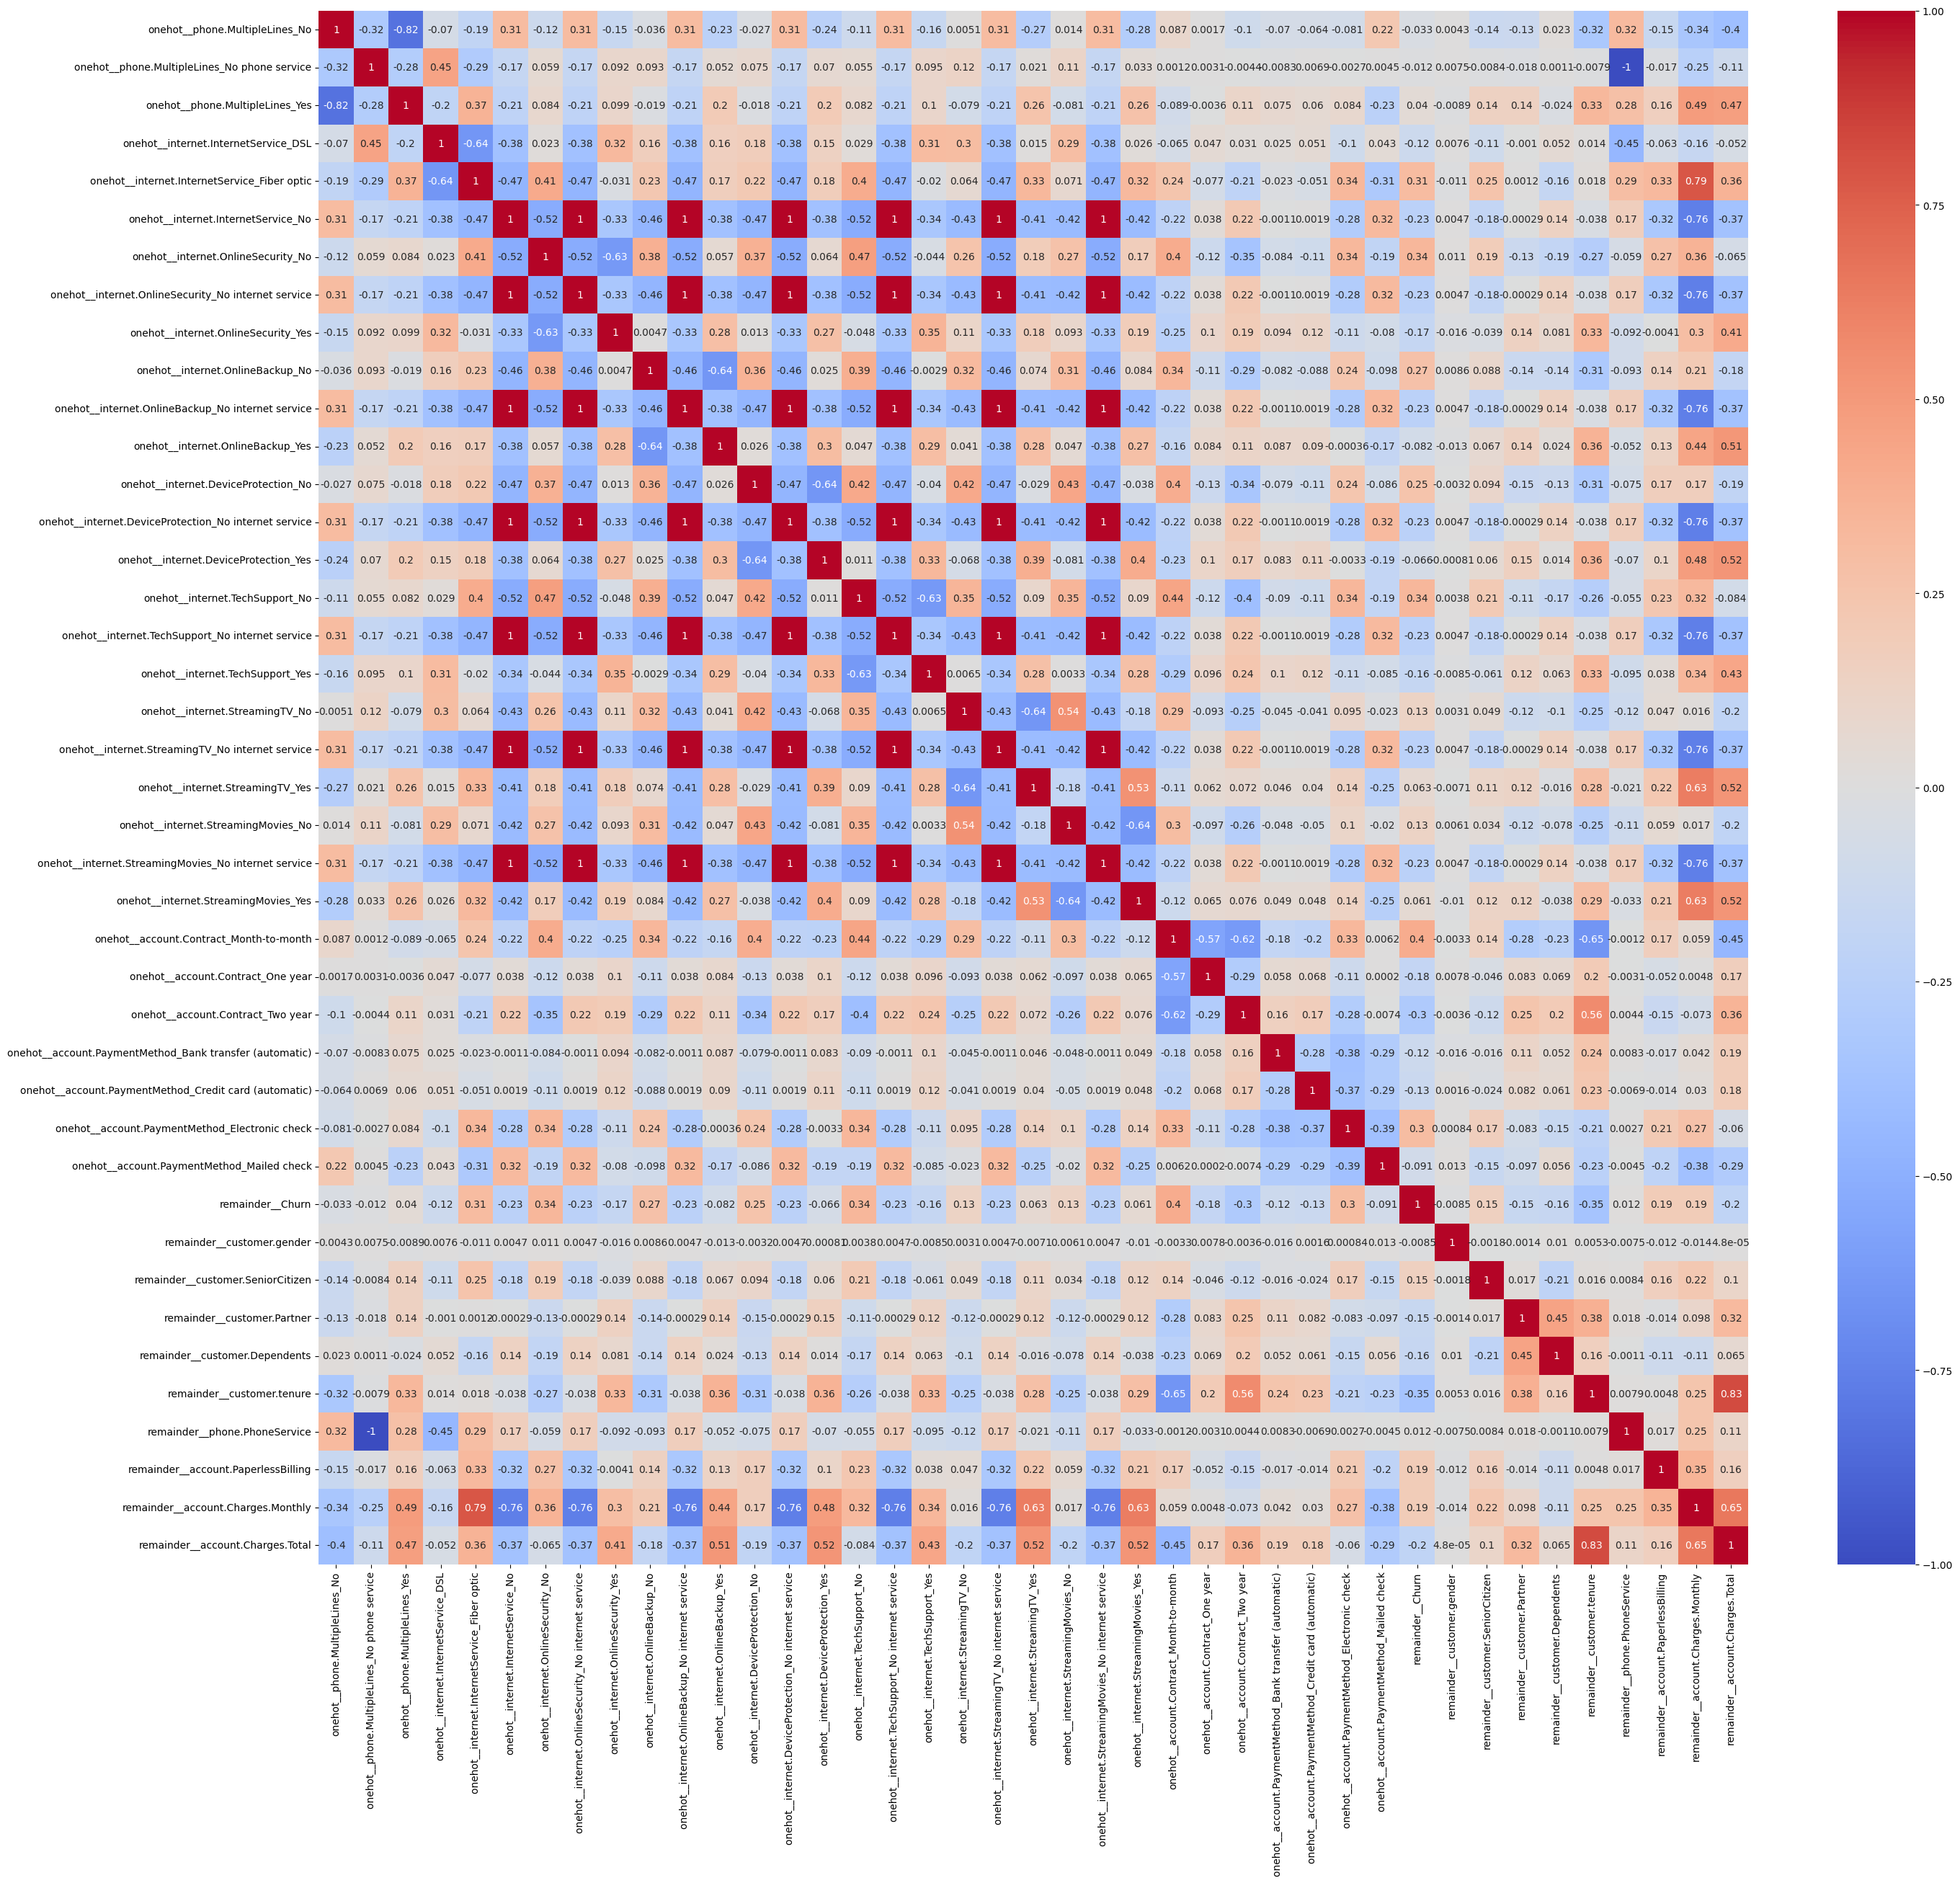

In [27]:
plt.figure(figsize=(32, 28))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm')
plt.show()

## Análises Direcionadas

In [28]:
strong_corr = pd.DataFrame(corr_matriz['remainder__Churn'][abs(corr_matriz['remainder__Churn']) > 0.3])
strong_corr = strong_corr.sort_values(by='remainder__Churn', ascending=False)
print(round(strong_corr, 2))

                                                remainder__Churn
remainder__Churn                                            1.00
onehot__account.Contract_Month-to-month                     0.40
onehot__internet.OnlineSecurity_No                          0.34
onehot__internet.TechSupport_No                             0.34
onehot__internet.InternetService_Fiber optic                0.31
onehot__account.PaymentMethod_Electronic check              0.30
onehot__account.Contract_Two year                          -0.30
remainder__customer.tenure                                 -0.35
